# Centro Galactico sobre el cielo de Chacaltaya


In [2]:
%matplotlib inline
import ephem
import numpy as np
from numpy import sin, cos,tan, arcsin, arctan,pi, arccos,radians, degrees
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [11]:
%%latex
 Si describimos el movimiento de la fuente en la bóveda celeste en coordenadas esféricas tenemos únicamente dos grados de libertad ya que $r$ se considera constante, y entonces su movimiento queda descrito de la siguiente manera:
 \begin{equation}
  \theta'_{t} =  \arccos(\cos(\delta)\sin( \omega t ))
\end{equation}
\begin{equation}
  \phi'_{t} = \arctan\left(\frac{\tan(\delta)}{\cos(\omega t)}\right)
\end{equation}
Donde t corresponde al tiempo y $\omega$ a la velocidad de rotación de la Tierra y $\delta$ es la DEC a la que se encuentra el CG.

<IPython.core.display.Latex object>

In [4]:
la=radians(0)

def phi(t,w):
    W=radians(w) #velocidad angular de rotacion de la tierra
    wt= (W*t)+(pi/2)
    p=arctan((sin(wt))/tan(la))
    Pdegrees=degrees(p)
#    return Pdegrees
    return p


def theta(t,w):
    W=radians(w) #velocidad angular de rotacion de la tierra
    wt= W*t+(pi/2)
    th=arccos(cos(la)*cos(wt))
    THdegrees=degrees(th)
    return th


In [5]:
%%latex
Este sistema primado será el sistema que corresponde al observador ubicado en el ecuador. Ahora, si nos movemos hacia el sur, hacia donde el CG pasa por el cenit, 29º sur, habría que hacer una rotación del sistema de coordenas de 29º en torno al eje $X$ ya que el eje $Y$ va de norte a sur y nos movemos hacia el sur. Lo que resulta en un sistema no primado tal que:

 \begin{equation}
  x = x'  
\end{equation}
 
 \begin{equation}
  y = y'\cos\nu+z'\sin\nu  
\end{equation}
  
 \begin{equation}
  z = -y'\sin\nu+ z'\cos\nu  
\end{equation}
 Donde $\nu$ son los grados que nos movemos hacia el sur. volviendo a coordenadas esféricas locales habiendo desplazado el observador $\nu$ grados hacia el Sur las coordenadas que describirían su movimiento por la bóveda celeste serían:
 
 \begin{equation}
 \label{teta}
\theta_t = \arccos\left(-\sin\nu\,\sin\theta'(t)\,\sin\phi'(t)+\cos\nu\,\cos\theta'(t)  \right)
\end{equation}

\begin{equation}
\label{fi}
\phi_t = \arctan \left(\cos\nu\,\tan\phi'(t)+ \frac{\sin\nu}{\sin\theta'(t)}  \right)
\end{equation}
                
El camino recorido por el Centro galctico en la boveda celeste local de Chacaltaya se muestra en en la siguiente figura.

<IPython.core.display.Latex object>

In [6]:
np.seterr(divide='ignore')
C=cos(radians(0)) #this is equators latitude
S=sin(radians(0))
t=0
lcha=radians(16)
time=np.array([12/5.,6.-3.,6.,6+2.1, 12-2])
t_detail = np.arange(0.,12.5,0.5)
def get_all(t):
    TEdegrees=degrees(arcsin(-S*cos(theta(t,15))*cos(phi(t,15))+C*sin(theta(t,15))))
    inside = (cos(theta(t,15))*sin(phi(t,15)))/((C*cos(theta(t,15))*cos(phi(t,15)))+(S*sin(theta(t,15))))
    Phi= -degrees(arctan(inside))+180
    xcha=sin(radians(Phi))*sin(radians(TEdegrees))
    ycha=(cos(lcha)*cos(radians(Phi))*sin(radians(TEdegrees)))+(sin(lcha)*cos(radians(TEdegrees)))
    zcha=(-sin(lcha)*cos(radians(Phi))*sin(radians(TEdegrees)))+(cos(lcha)*cos(radians(TEdegrees)))
    return xcha, ycha, zcha
xcha, ycha, zcha = get_all(time)
xi, yi, zi = get_all(t_detail)


theta_final = degrees(arccos(zcha))
phi_2 = degrees(xcha/sin(radians(theta_final)))
phi_final = phi_2[::-1]

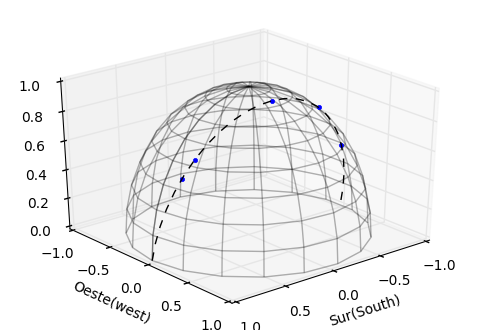

In [7]:

fig = plt.figure()
ax = fig.gca(projection='3d')
u, v = np.mgrid[0:2*pi:20j, 0:pi/2:10j]
x=cos(u)*sin(v)
y=sin(u)*sin(v)
z=cos(v)
ax.plot_wireframe(x, y, z, color="black",alpha=0.3)
ax.azim = 50
ax.plot(xcha,ycha, zcha, 'b.')
ax.plot(xi,yi, zi,'k--')
plt.xlabel("Sur(South)")
plt.ylabel("Oeste(west)")


In [8]:
%%latex
La tabla presenta 24 puntos en el camino del GC. Representados en coordenadas $\theta$: grados desde el cenit hacia el horizonte. Y $\phi$: grados desde la direccion norte en el sentido de las agujas del reloj en el plano.

<IPython.core.display.Latex object>

In [9]:

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)


import random
table = ListTable()
table.append(['theta(deg)', 'phi(deg)'])
for i in range(0, len(theta_final)):
    table.append([theta_final[i], phi_final[i]+180.])

table



theta(deg),phi(deg)
55.5966359147,123.416241454
47.1786501198,127.746822395
16.0,180.0
34.9541946632,235.23588922
61.2733882042,236.180298957


## Secundarios en el detector

In [24]:
%%latex


\begin{equation}
F= N_{prim} \, N_{sec} \int a{(\theta_t)}\, \eta{(\theta_t)}
\end{equation}

\begin{equation}
N_{primarios}= F_{f} \times  \pi  R^2  \times 2\pi \left(1-\cos\xi \right) 
\end{equation}


En esta ecuación $F_{f}$ es el flujo dado por la fuente previamente mencionada, el segundo término corresponde a area de la ZAD proyectada y el tercer término es la apertura angular del detector respecto a esta señal.
Si se toma D=20km y R=87mts, el número $N_{primarios}$ de lluvias relevantes estará entre unas 500 y 1000 lluvias por hora dependiendo de cual de los 6 flujos proporcionados se utilice.


<IPython.core.display.Latex object>

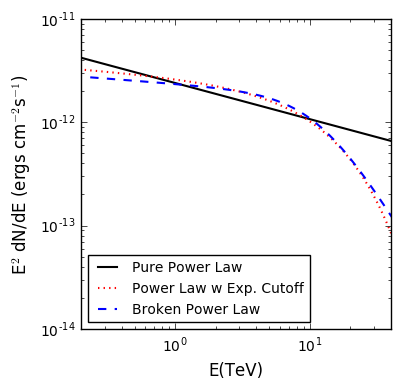

In [69]:
def Nprim(F):
    R = 86.
    D = 20000.
    eta = np.arctan(R/D)
    result = F * np.pi * (R**2) * 2 * np.pi * (1-np.cos(eta))
    return result
    
    
def powerLaw(E):
    result= 2.4e-12* (E ** -2.35)
    return result

def smoothlBrk(E):
    result = 3.62e-10 * (E **- 4.14) / (1+(E/11.8)**(2.1-4.14))
    return result

def exponentialCut(E):
    result = 2.8e-12 * (E **- 2.1) * np.exp(-E/12.8)
    return result

E =  np.logspace(-1, 2, num=100)

powe = map(powerLaw, E)
smooth = map(smoothlBrk, E)
expocut = map(exponentialCut, E)

fig , ax = plt.subplots(figsize=[4,4])
ax.set_xlabel('E(TeV)',fontsize=12)
ax.set_ylabel(r'E$^2$ dN/dE (ergs cm$^{-2}$s$^{-1}$)',fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.2,40])
ax.set_ylim([1e-14,1e-11])
ax.plot(E, powe* (E**2),'k-',linewidth=1.5, label='Pure Power Law')
ax.plot(E,expocut*(E**2),'r:',linewidth=1.5, label='Power Law w Exp. Cutoff')
ax.plot(E, smooth*(E**2),'b--',linewidth=1.5, label= 'Broken Power Law') 
legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=10)
#frame = legend.get_frame()